In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df1 = pd.read_csv('./train.csv')

In [315]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


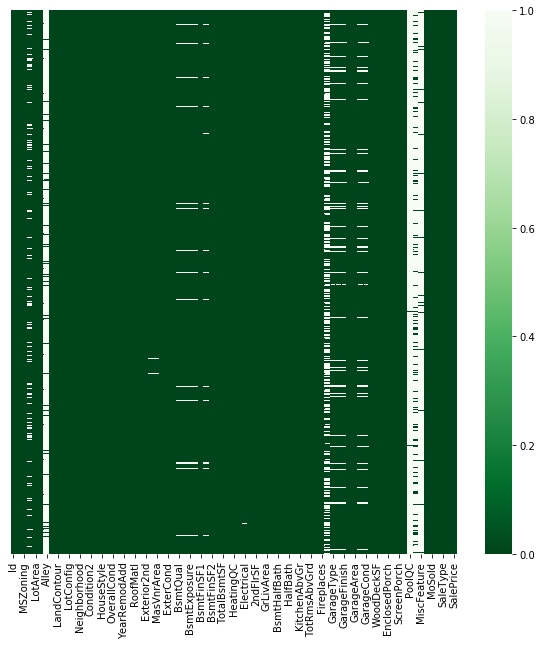

In [316]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.isnull(),cmap='Greens_r',yticklabels=False)

In [317]:
feature_with_null = [feature for feature in df1.columns if df1[feature].isnull().sum()>0]
for feature in feature_with_null:
    print(feature,df1[feature].isnull().sum()/df1[feature].shape[0],"% value is missing")

LotFrontage 0.1773972602739726 % value is missing
Alley 0.9376712328767123 % value is missing
MasVnrType 0.005479452054794521 % value is missing
MasVnrArea 0.005479452054794521 % value is missing
BsmtQual 0.025342465753424658 % value is missing
BsmtCond 0.025342465753424658 % value is missing
BsmtExposure 0.026027397260273973 % value is missing
BsmtFinType1 0.025342465753424658 % value is missing
BsmtFinType2 0.026027397260273973 % value is missing
Electrical 0.0006849315068493151 % value is missing
FireplaceQu 0.4726027397260274 % value is missing
GarageType 0.05547945205479452 % value is missing
GarageYrBlt 0.05547945205479452 % value is missing
GarageFinish 0.05547945205479452 % value is missing
GarageQual 0.05547945205479452 % value is missing
GarageCond 0.05547945205479452 % value is missing
PoolQC 0.9952054794520548 % value is missing
Fence 0.8075342465753425 % value is missing
MiscFeature 0.963013698630137 % value is missing


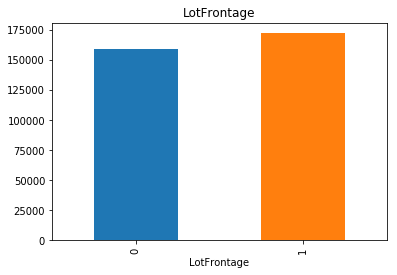

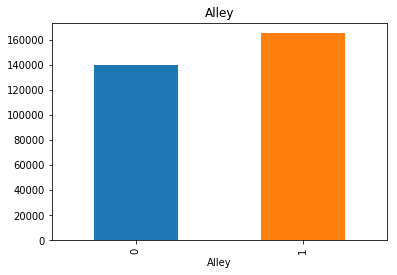

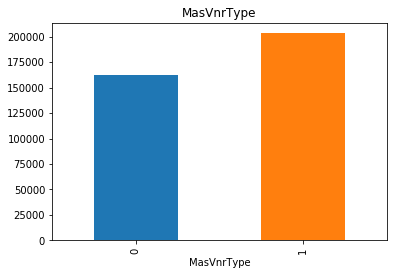

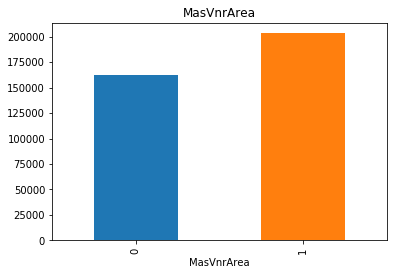

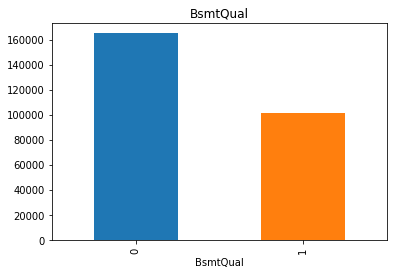

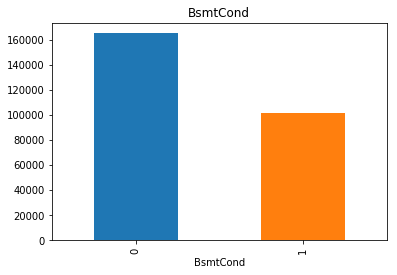

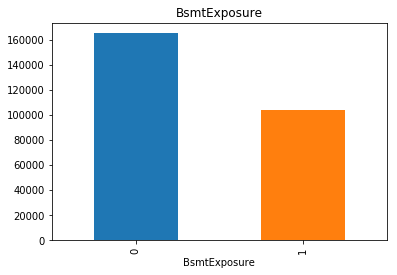

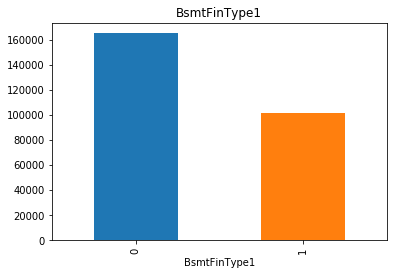

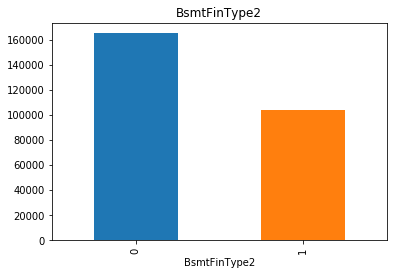

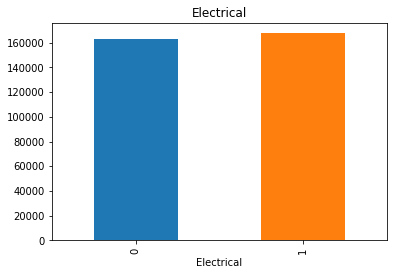

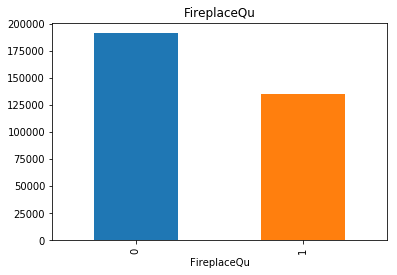

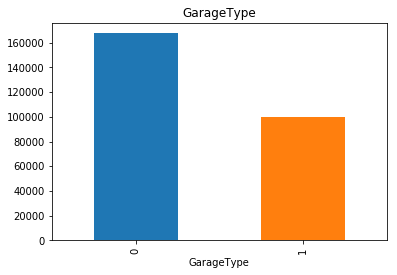

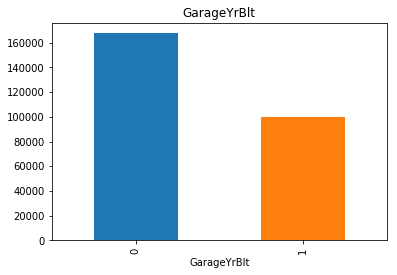

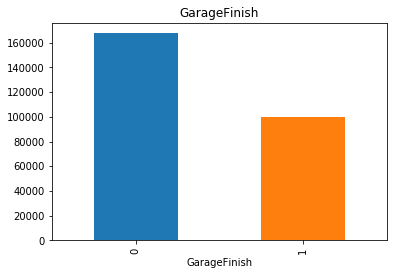

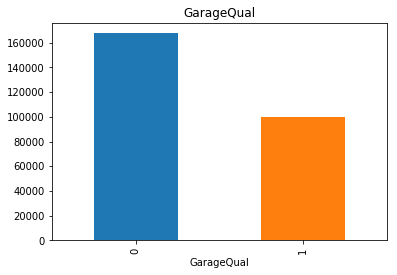

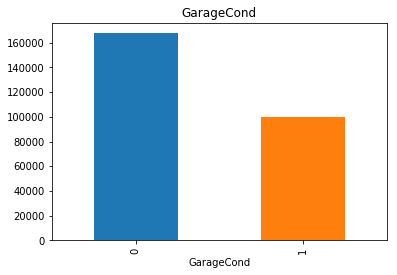

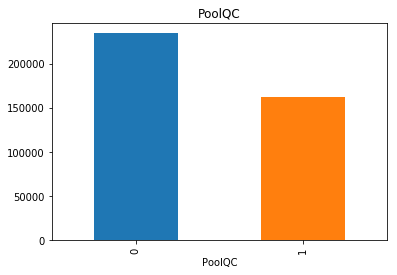

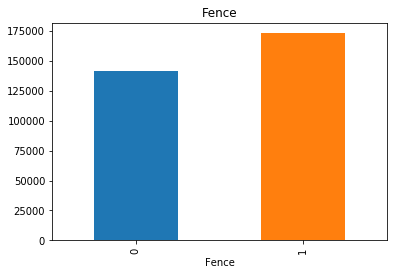

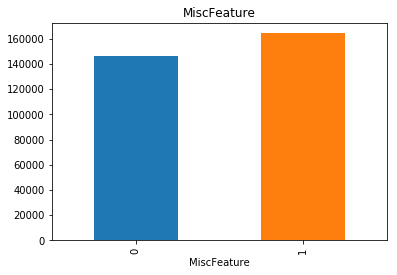

In [318]:
for feature in feature_with_null:
    data = df1.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

   ## As we can see that there are clear relation betweem the null values and the dependent variable so we have to fill in the missing values

### Dropping the column id as it has no importance

In [319]:
df1 = df1.drop('Id',axis=1)

# Calculating the number of numerical data present in the dataframe

In [320]:
num_numerical = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print("The number of numerical feature is", len(num_numerical))


The number of numerical feature is 37


### Calculating temporal variables

In [321]:
year_feature = [feature for feature in df1.columns if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [322]:
for feature in year_feature:
    print(feature)
    print(df1[feature].unique())

YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

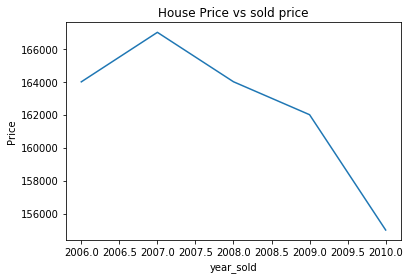

In [323]:
### checking if their is relation between year the house was sold and sales price
df1.groupby('YrSold')['SalePrice'].median().plot()
plt.title('House Price vs sold price')
plt.xlabel('year_sold')
plt.ylabel('Price')
plt.show()

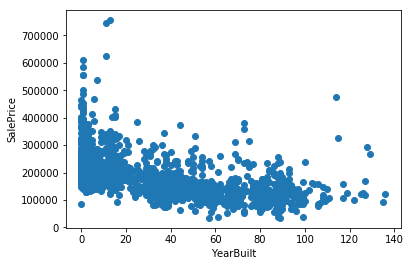

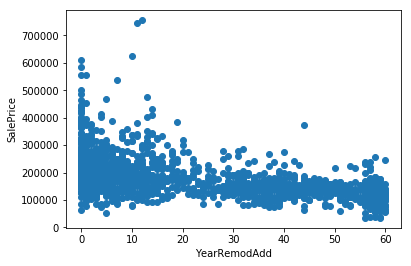

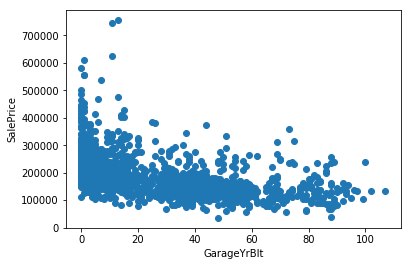

In [324]:
### seeing the difference between the year_feature with year sold and relation with sales price
for feature in year_feature:
    if feature!='YrSold':
        data = df1.copy()
        data[feature] = abs(data[feature]-data['YrSold'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [325]:
### Finding Discrete values
discrete_feature = [feature for feature in num_numerical if len(np.unique(df1[feature],return_counts=True)[0]) < 25 and feature not in year_feature ]
print("the number of discrete feature are",len(discrete_feature))

the number of discrete feature are 17


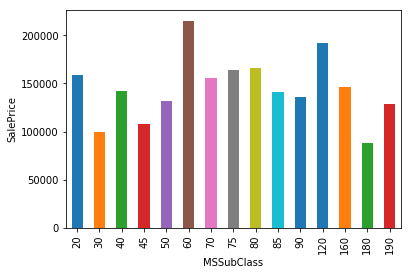

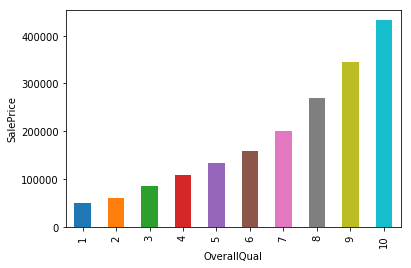

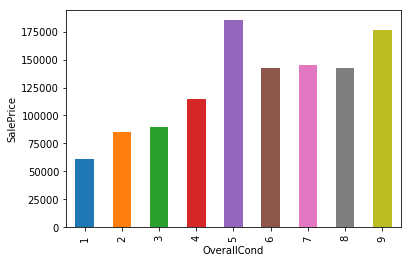

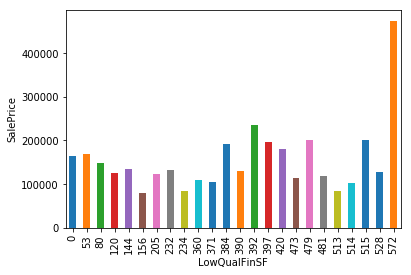

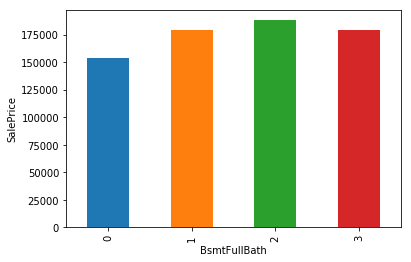

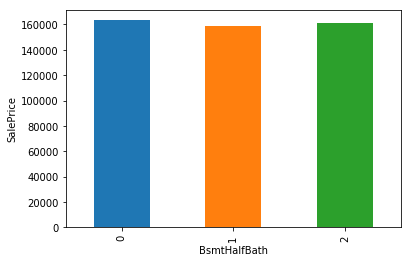

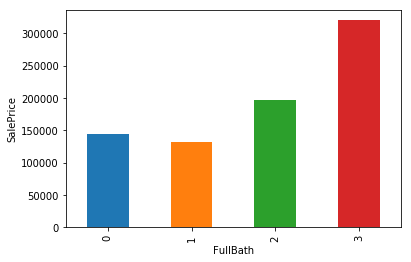

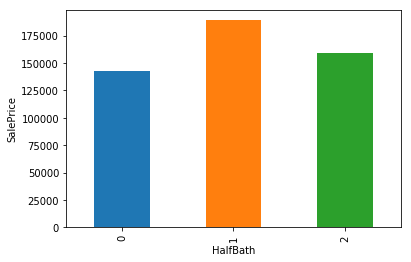

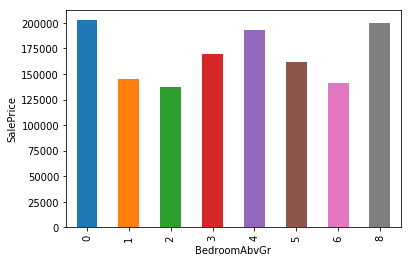

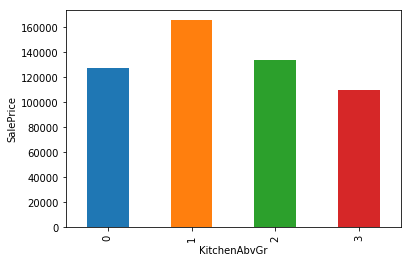

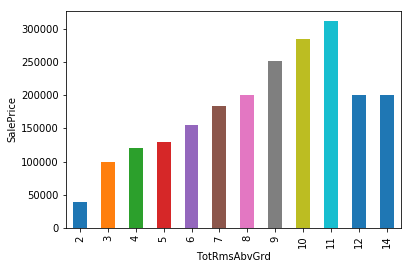

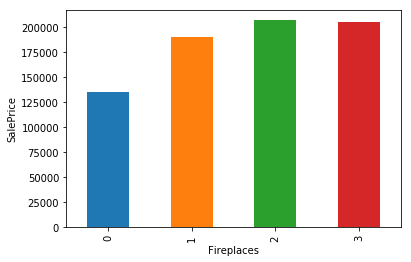

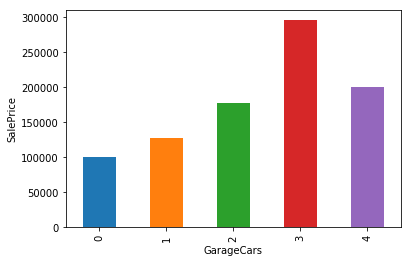

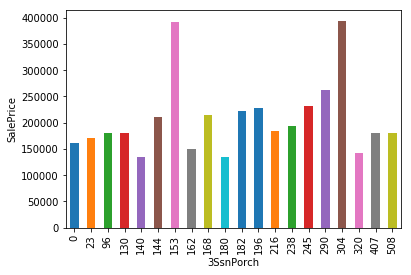

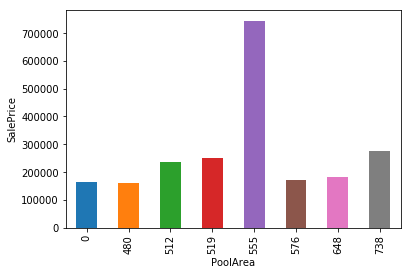

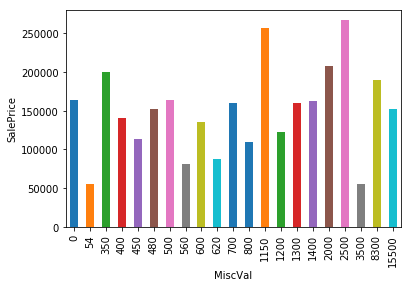

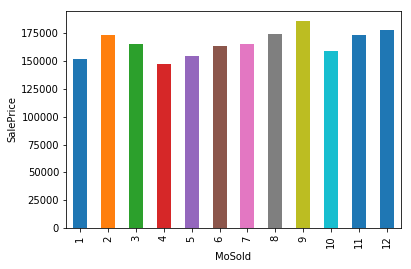

In [326]:
###Relation of discrete featur with the dependent variable
for feature in discrete_feature:
    data = df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

In [327]:
continious_feature = [feature for feature in num_numerical if feature not in discrete_feature and feature not in year_feature]
len(continious_feature)
continious_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

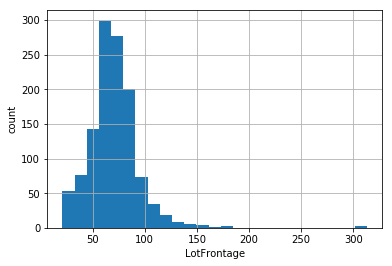

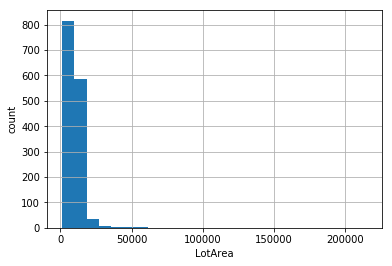

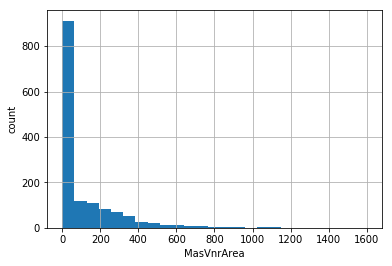

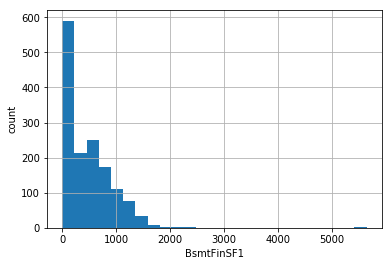

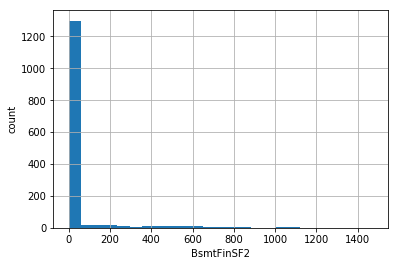

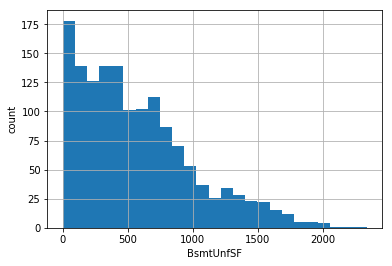

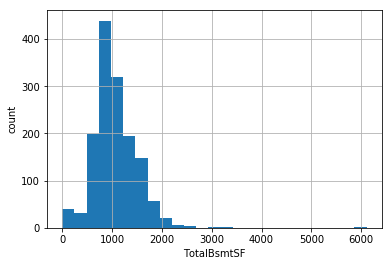

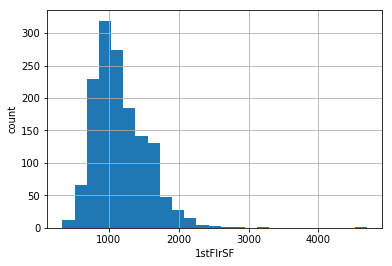

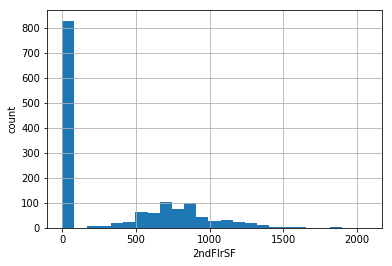

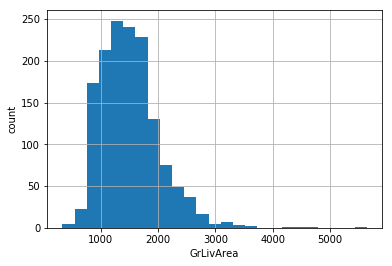

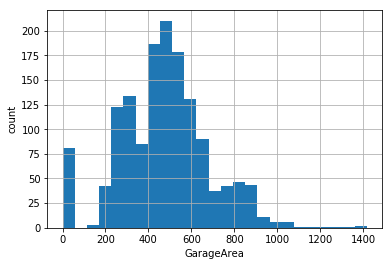

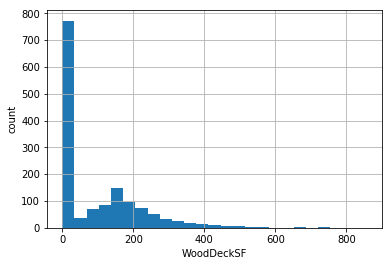

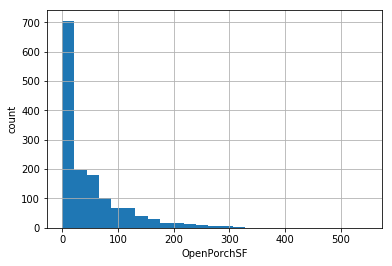

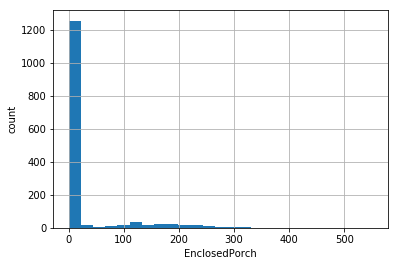

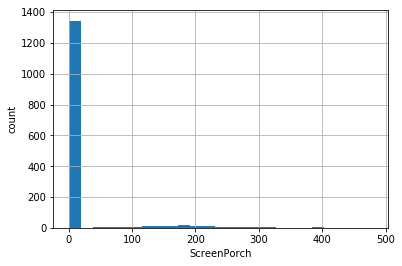

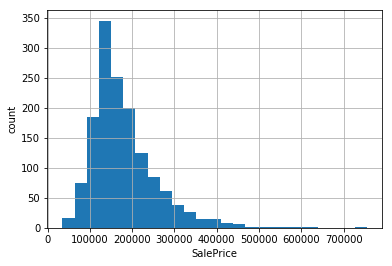

In [328]:
####Relation of continious feature with dependent variable 
for feature in continious_feature:
    data = df1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

### As we can see that few of the continious data are not in gaussian distribution so it is a skewed data and we have to perform Logarithmic trnsformation to make data normally distributed

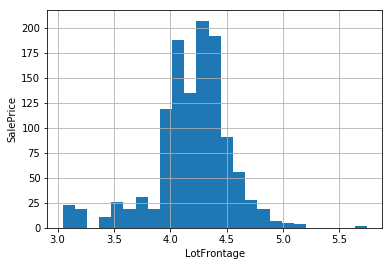

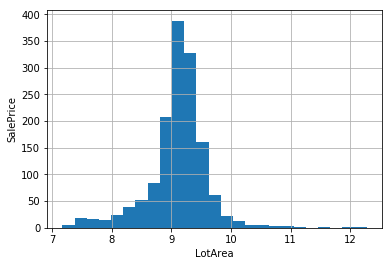

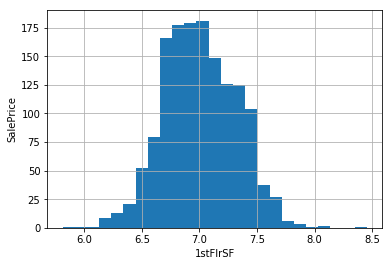

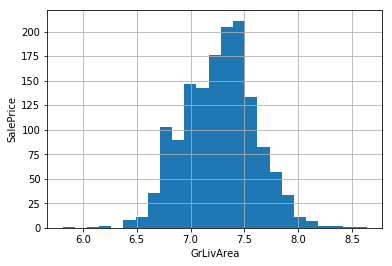

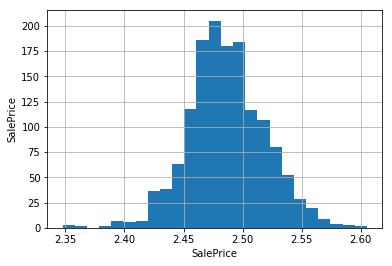

In [329]:
for feature in continious_feature:
    data = df1.copy()
    if 0 in np.unique(data[feature]):
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        data[feature].hist(bins=25)
        plt.xlabel(feature,)
        plt.ylabel('SalePrice')
        plt.show()
        

### Outliners

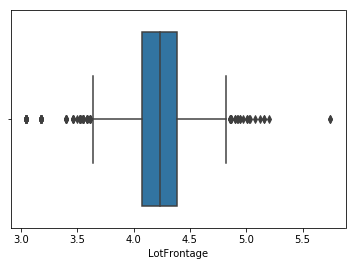

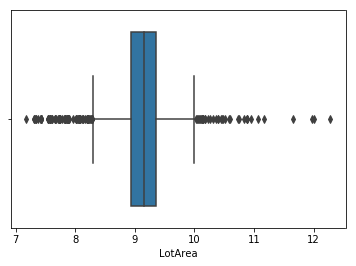

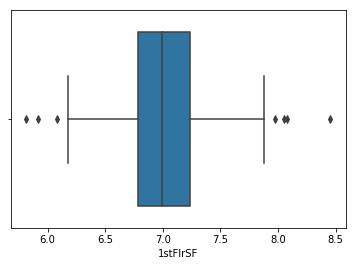

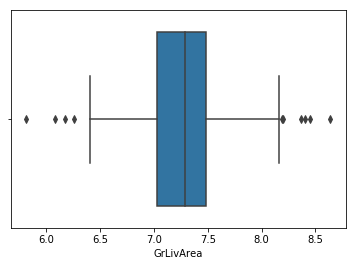

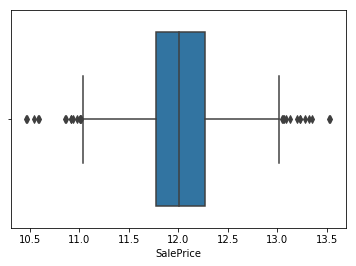

In [330]:
for feature in continious_feature:
    data = df1.copy()
    if 0 in np.unique(data[feature]):
        pass
    else:
        data[feature] = np.log(data[feature])
        sns.boxplot(x=feature,data=data)
        plt.show()

### the points below 0 percentile and above 100 percentile can be considered as outliners

### Categorical Features

In [331]:
categorical_feature = [feature for feature in df1.columns if df1[feature].dtype=='O']
len(categorical_feature)
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [332]:
for feature in categorical_feature:
    print("The different categories in feature are ", df1[feature].unique())

The different categories in feature are  ['RL' 'RM' 'C (all)' 'FV' 'RH']
The different categories in feature are  ['Pave' 'Grvl']
The different categories in feature are  [nan 'Grvl' 'Pave']
The different categories in feature are  ['Reg' 'IR1' 'IR2' 'IR3']
The different categories in feature are  ['Lvl' 'Bnk' 'Low' 'HLS']
The different categories in feature are  ['AllPub' 'NoSeWa']
The different categories in feature are  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
The different categories in feature are  ['Gtl' 'Mod' 'Sev']
The different categories in feature are  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
The different categories in feature are  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
The different categories in feature are  ['Norm' 'Artery' 'RRNn' 'Feedr' '

### relationship of categorical feature with respect to Dependent variable

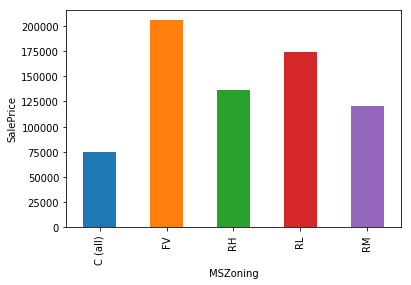

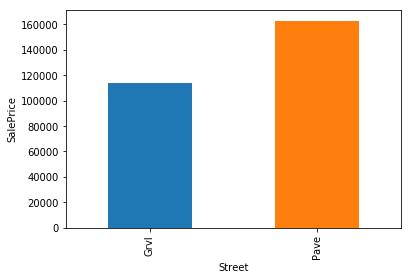

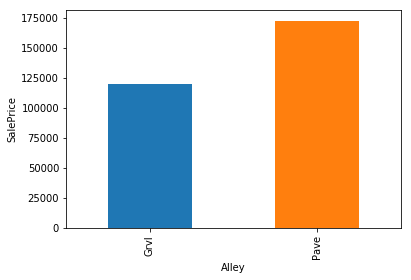

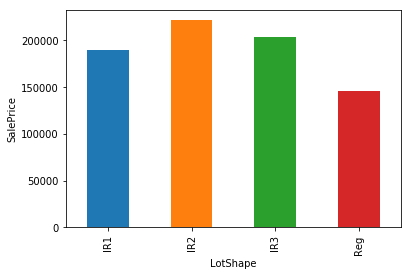

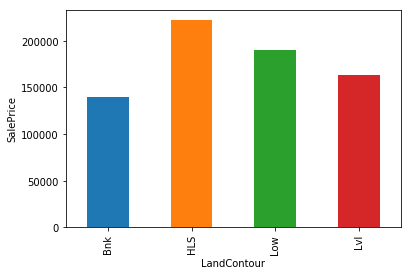

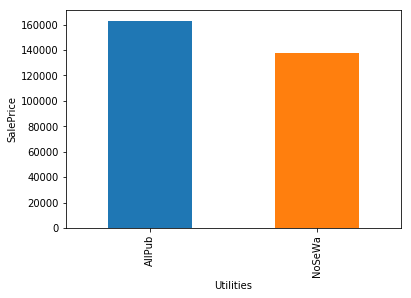

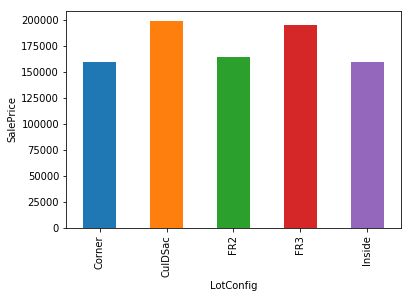

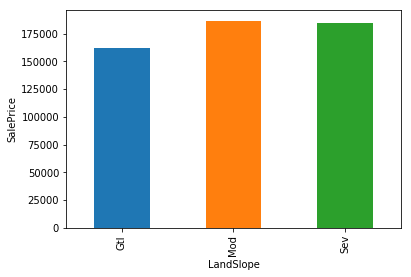

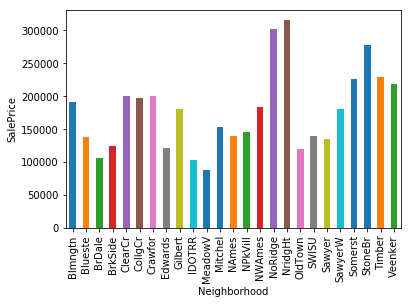

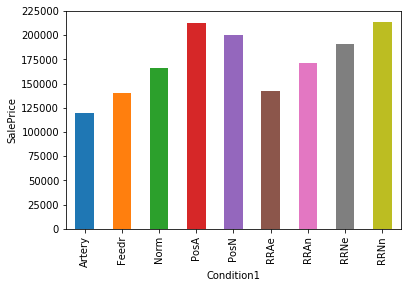

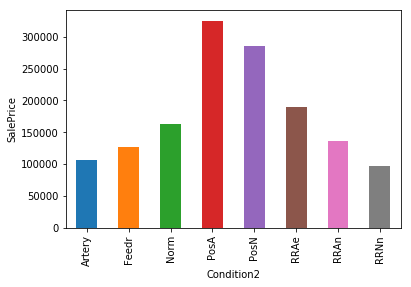

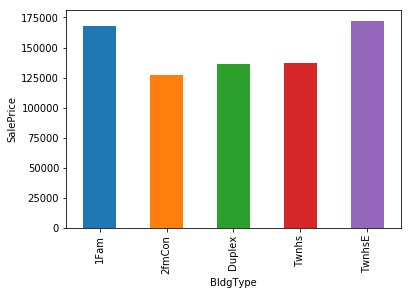

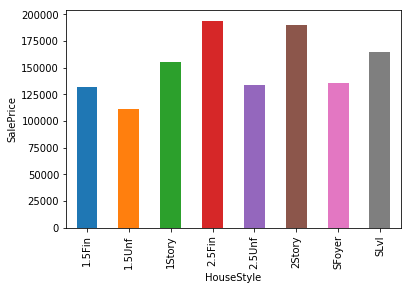

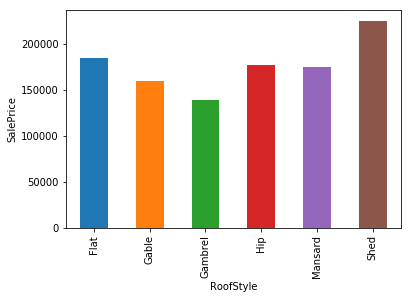

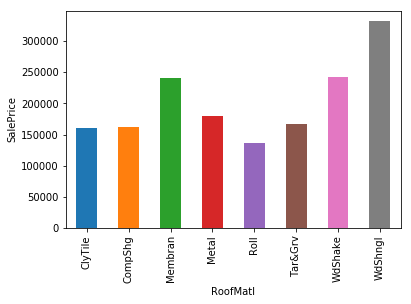

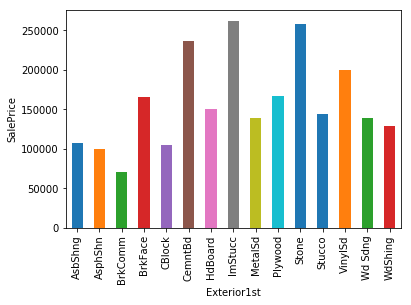

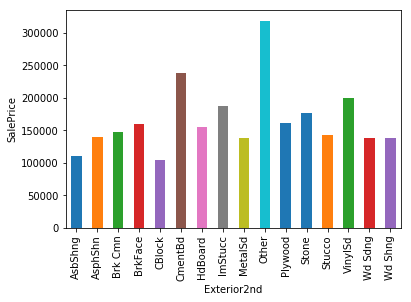

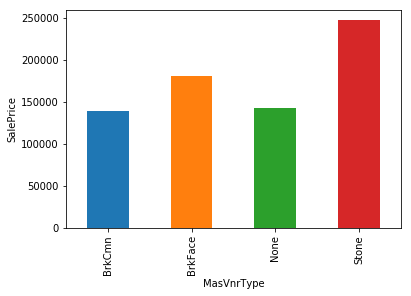

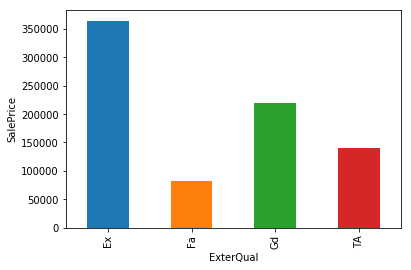

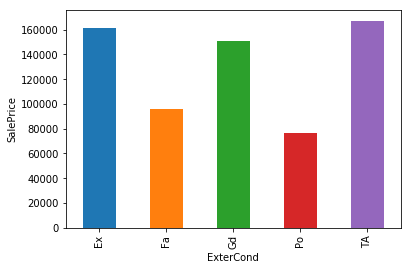

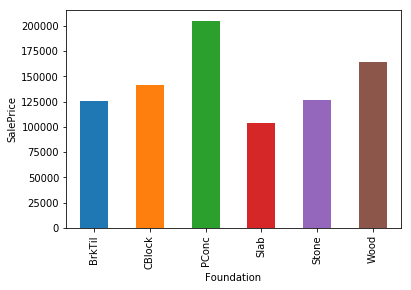

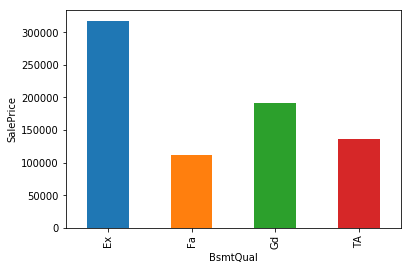

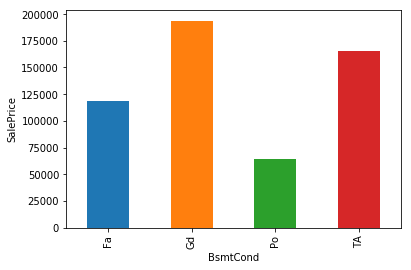

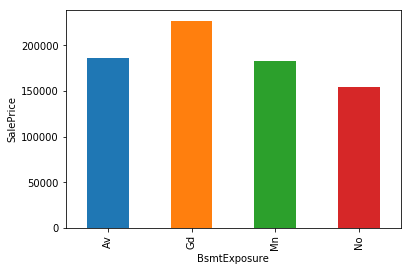

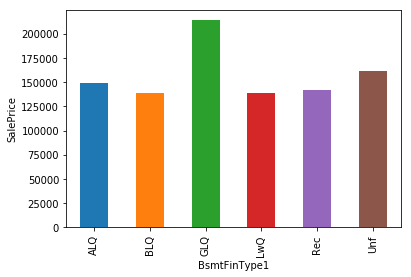

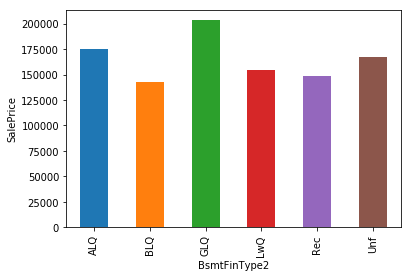

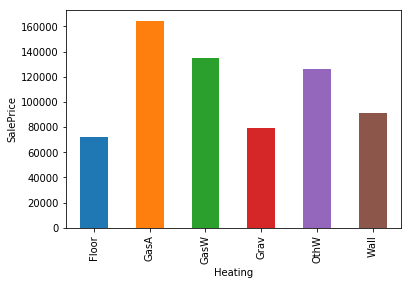

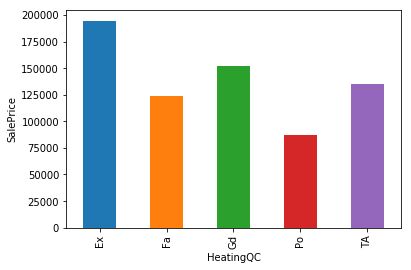

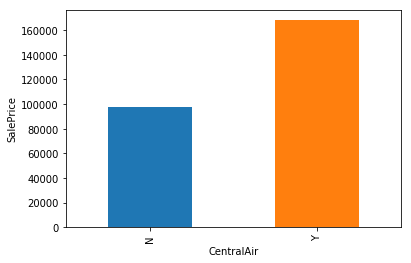

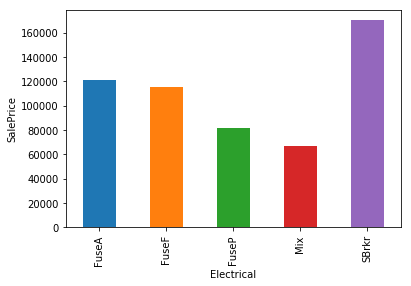

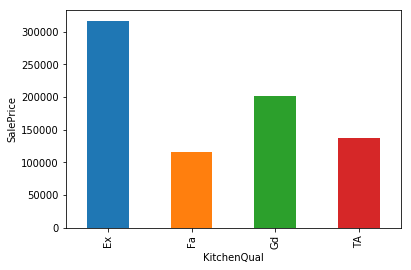

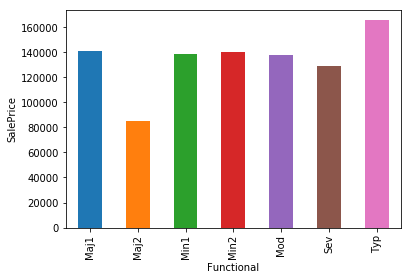

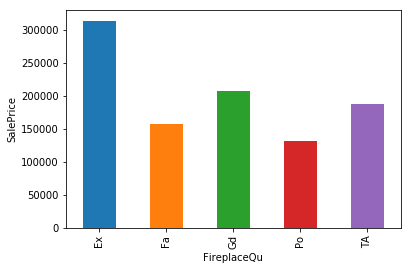

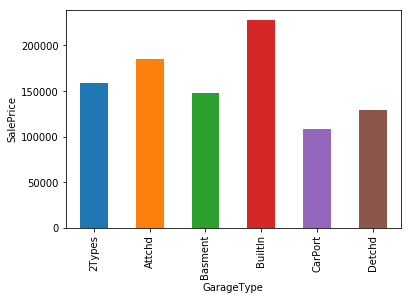

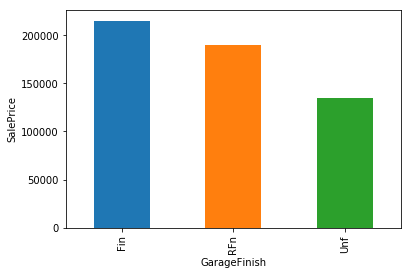

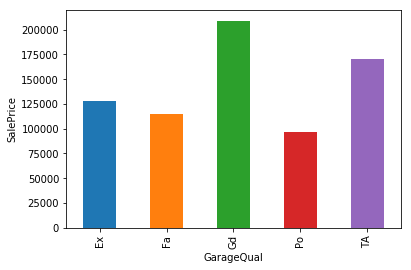

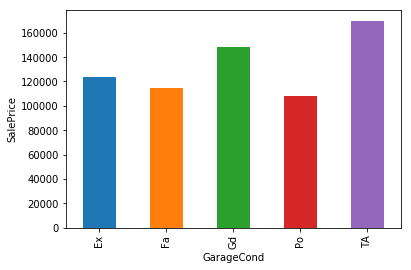

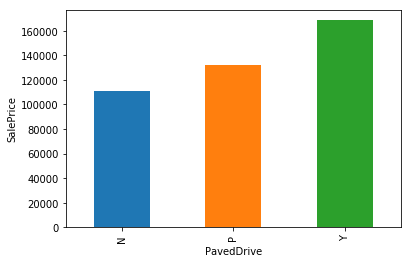

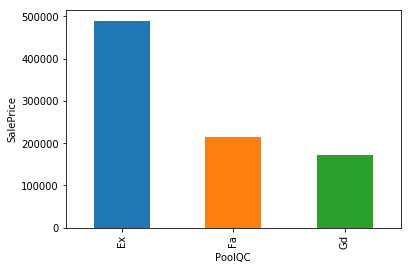

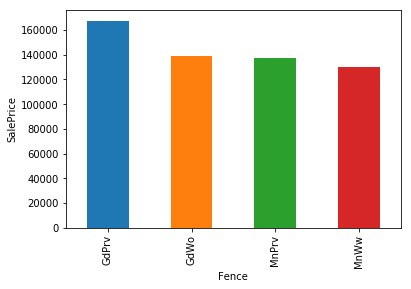

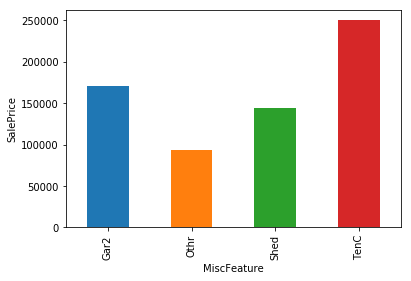

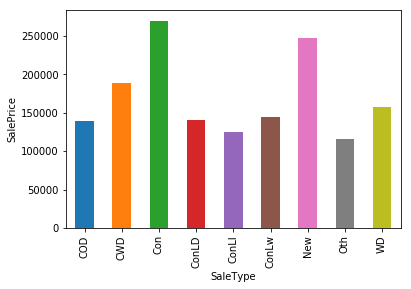

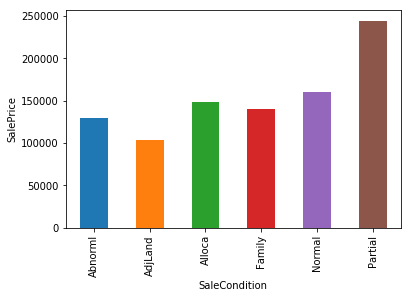

In [333]:
for feature in categorical_feature:
    data = df1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## FEATURE ENGINNERING

In [334]:
### Replacing NAN value in categorical data with the new label 'missing'

In [335]:
feature_nan = [feature for feature in categorical_feature if df1[feature].isnull().sum()>0]
for feature in feature_nan:
    df1[feature].fillna('missing',inplace=True)

df1[feature_nan].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [336]:
### Replacing Nan value in numerical data to some number.As we can see that are lot of outliners so we will use median in place of mean
for feature in num_numerical:
    df1[feature].fillna(df1[feature].median(),inplace=True)
df1[num_numerical].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [337]:
###Replacing nan value present in temporal feature.Here we are converting each of the temporal feature to difference between year_sold and that feature

In [338]:
for feature in year_feature:
    if feature!='YrSold':
        df1[feature] = df1['YrSold']-df1[feature]
df1[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [339]:
###Log Transformation of the skewed data to convert it into gaussian distribution

In [340]:
for feature in continious_feature:
    if 0 in np.unique(df1[feature]):
        pass
    else:
        df1[feature] = np.log(df1[feature])
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,...,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,...,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,...,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,...,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216


## Handling rare categorical feature
rare categorical feature are those feature which are present in less than 1% of the observation

In [341]:
for feature in categorical_feature:
    temp = df1.groupby(feature)['SalePrice'].count()/len(df1)
    temp_df = temp[temp>0.01].index
    df1[feature] = np.where(df1[feature].isin(temp_df),df1[feature],'rare_val')
df1.shape

(1460, 80)

In [342]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_feature:
    df1[feature] = le.fit_transform(df1[feature])
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,2,4.174387,9.041922,0,2,2,3,0,3,...,0,0,3,1,0,2,2008,2,2,12.247694
1,20,2,4.382027,9.169518,0,2,2,3,0,2,...,0,0,3,1,0,5,2007,2,2,12.109011
2,60,2,4.219508,9.328123,0,2,0,3,0,3,...,0,0,3,1,0,9,2008,2,2,12.317167
3,70,2,4.094345,9.164296,0,2,0,3,0,0,...,0,0,3,1,0,2,2006,2,0,11.849398
4,60,2,4.430817,9.565214,0,2,0,3,0,2,...,0,0,3,1,0,12,2008,2,2,12.429216


## Feature Scaling

In [343]:
### feature scaling is done so that the data given in different units can be bring under a proper scale

In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [345]:
feature_scale = [feature for feature in df1.columns if feature not in ['SalePrice']]
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df1[feature_scale]),columns=feature_scale)

In [346]:
data = pd.concat([df1['SalePrice'].reset_index(drop=True),data],axis=1)

In [347]:
data.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.5,0.418208,0.366344,0.0,1.0,0.666667,1.0,0.0,...,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.50,0.666667,0.5
1,12.109011,0.000000,0.5,0.495064,0.391317,0.0,1.0,0.666667,1.0,0.0,...,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.25,0.666667,0.5
2,12.317167,0.235294,0.5,0.434909,0.422359,0.0,1.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.50,0.666667,0.5
3,11.849398,0.294118,0.5,0.388581,0.390295,0.0,1.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.00,0.666667,0.0
4,12.429216,0.235294,0.5,0.513123,0.468761,0.0,1.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.75,0.5,0.0,1.000000,0.50,0.666667,0.5


In [348]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [376]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.5,0.418208,0.366344,0.0,1.0,0.666667,1.0,0.0,0.75,...,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.50,0.666667,0.5
1,0.000000,0.5,0.495064,0.391317,0.0,1.0,0.666667,1.0,0.0,0.50,...,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.25,0.666667,0.5
2,0.235294,0.5,0.434909,0.422359,0.0,1.0,0.000000,1.0,0.0,0.75,...,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.50,0.666667,0.5
3,0.294118,0.5,0.388581,0.390295,0.0,1.0,0.000000,1.0,0.0,0.00,...,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.00,0.666667,0.0
4,0.235294,0.5,0.513123,0.468761,0.0,1.0,0.000000,1.0,0.0,0.50,...,0.0,0.0,0.0,0.75,0.5,0.0,1.000000,0.50,0.666667,0.5


In [367]:
Y=data.iloc[:,0]

In [373]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [386]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [395]:
All_col = feature_sel_model.get_support()

In [396]:
col_name = X.columns

In [397]:
selected_col=[]
for i in range(len(col_name)):
    if All_col[i]:
        selected_col.append(col_name[i])

In [403]:
final_X = X[selected_col]
print(final_X.shape)
final_X.head()

(1460, 23)


,MSZoning,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.5,0.666667,0.0,0.666667,0.036765,0.098361,0.333333,0.50,0.75,0.333333,...,0.577712,0.333333,0.666667,0.666667,0.000000,1.0,0.0,0.333333,0.50,1.0
1,0.5,0.666667,0.0,0.555556,0.227941,0.524590,0.666667,0.50,0.25,0.000000,...,0.470245,0.000000,0.666667,1.000000,0.333333,0.8,0.0,0.333333,0.50,1.0
2,0.5,0.000000,0.0,0.666667,0.051471,0.114754,0.333333,0.50,0.50,0.333333,...,0.593095,0.333333,0.666667,0.666667,0.333333,0.8,0.0,0.333333,0.50,1.0
3,0.5,0.000000,0.0,0.666667,0.669118,0.606557,0.666667,0.75,0.75,0.000000,...,0.579157,0.333333,0.333333,0.666667,0.333333,0.4,0.6,0.666667,0.75,1.0
4,0.5,0.000000,0.0,0.777778,0.058824,0.147541,0.333333,0.50,0.00,0.333333,...,0.666523,0.333333,0.666667,0.666667,0.333333,0.8,0.0,0.333333,0.75,1.0


### TRAINING OF MODEL

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [494]:
le = LinearRegression(n_jobs=10)
le.fit(final_X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

## Model Testing

In [495]:
df1 = pd.read_csv('./test.csv')


In [496]:
feature_nan = [feature for feature in categorical_feature if df1[feature].isnull().sum()>0]
for feature in feature_nan:
    df1[feature].fillna('missing',inplace=True)

df1[feature_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [497]:
for feature in num_numerical:
    if feature!='SalePrice':
        df1[feature].fillna(df1[feature].median(),inplace=True)

In [498]:
for feature in year_feature:
    if feature!='YrSold':
        df1[feature] = df1['YrSold']-df1[feature]
df1[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


In [499]:
for feature in continious_feature:
    if feature!='SalePrice':
        if 0 in np.unique(df1[feature]):
            pass
        else:
            df1[feature] = np.log(df1[feature])
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,...,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal
1,1462,20,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,...,0,0,missing,missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,...,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal
3,1464,60,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,...,0,0,missing,missing,missing,0,6,2010,WD,Normal
4,1465,120,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,...,144,0,missing,missing,missing,0,1,2010,WD,Normal


In [500]:
for feature in categorical_feature:
    temp = df1.groupby(feature)['LotFrontage'].count()/df1.shape[0]
    temp_df = temp[temp>0.01].index
    df1[feature] = np.where(df1[feature].isin(temp_df),df1[feature],'rare_val')
df1.shape

(1459, 80)

In [501]:
lec = LabelEncoder()
for feature in categorical_feature:
    if feature!='SalePrice':
        df1[feature] = lec.fit_transform(df1[feature])
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4,4.382027,9.360655,0,2,2,3,0,...,120,0,0,2,1,0,6,2010,3,2
1,1462,20,2,4.394449,9.565704,0,2,0,3,0,...,0,0,0,3,2,12500,6,2010,3,2
2,1463,60,2,4.304065,9.534595,0,2,0,3,0,...,0,0,0,2,1,0,3,2010,3,2
3,1464,60,2,4.356709,9.208138,0,2,0,3,0,...,0,0,0,3,1,0,6,2010,3,2
4,1465,120,2,3.761200,8.518193,0,2,0,1,0,...,144,0,0,3,1,0,1,2010,3,2


In [502]:
test_data = pd.DataFrame(scaler.fit_transform(df1[feature_scale]),columns=feature_scale)

In [503]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,1.0,0.593445,0.566360,0.0,1.0,0.666667,1.000000,0.0,0.75,...,0.208333,0.0,0.0,0.50,0.5,0.000000,0.454545,1.0,0.75,0.5
1,0.000000,0.5,0.598957,0.622527,0.0,1.0,0.000000,1.000000,0.0,0.00,...,0.000000,0.0,0.0,0.75,1.0,0.735294,0.454545,1.0,0.75,0.5
2,0.235294,0.5,0.558854,0.614005,0.0,1.0,0.000000,1.000000,0.0,0.75,...,0.000000,0.0,0.0,0.50,0.5,0.000000,0.181818,1.0,0.75,0.5
3,0.235294,0.5,0.582212,0.524583,0.0,1.0,0.000000,1.000000,0.0,0.75,...,0.000000,0.0,0.0,0.75,0.5,0.000000,0.454545,1.0,0.75,0.5
4,0.588235,0.5,0.317987,0.335596,0.0,1.0,0.000000,0.333333,0.0,0.75,...,0.250000,0.0,0.0,0.75,0.5,0.000000,0.000000,1.0,0.75,0.5


In [505]:
test_data= test_data[selected_col]

In [506]:
y_pred = le.predict(test_data)

In [507]:
y_pred = pd.DataFrame(y_pred,columns=['Y_Predicted'])

In [510]:
y_pred.head()

,Y_Predicted
0,11.368928
1,11.836522
2,11.965244
3,12.066088
4,12.066731


In [512]:
y_pred.to_csv('./prdicted_value')